# Stroke data exploration

Data retrieved from [this Kaggle page](https://www.kaggle.com/lirilkumaramal/heart-stroke).

## Import & analyze data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train_strokes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


Glucose level is in mg/dL (avg is between 90 to 110 mg/dL)

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

Check unique values of each categorical column.

In [2]:
def print_unique_values(df_value):
    print('gender', df_value['gender'].unique())
    print('ever_married', df_value['ever_married'].unique())
    print('work_type', df_value['work_type'].unique())
    print('Residence_type', df_value['Residence_type'].unique())
    print('smoking_status', df_value['smoking_status'].unique())

print_unique_values(df)

gender ['Male' 'Female' 'Other']
ever_married ['No' 'Yes']
work_type ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Residence_type ['Rural' 'Urban']
smoking_status [nan 'never smoked' 'formerly smoked' 'smokes']


## Normalize data

Transform several columns to categorical data.

- gender: [male, female, other] -> [0, 1, 2]
- ever_married: [No, Yes] -> [0, 1]
- work_type: [children, Private, Never_worked, Self-employed, Govt_job] -> [0, 1, 2, 3, 4]
- Residence_type [Rural, Urban] -> [0, 1]
- smoking_status [~~unknown~~, never smoked, formerly smoked, smokes] -> [0, 1, 2] 


In [3]:
dft = df.copy()

dft = dft.drop(['id'], axis=1)
dft['gender'] = dft['gender'].factorize()[0]
dft['age'] = dft['age'].apply(np.floor)
dft['ever_married'] = dft['ever_married'].factorize()[0]
dft['work_type'] = dft['work_type'].factorize()[0]
dft['Residence_type'] = dft['Residence_type'].factorize()[0]

dft = dft.dropna()

dft['smoking_status'] = dft['smoking_status'].factorize()[0]


dfStrokeTrue = dft[dft['stroke'] == 1]

dfStrokeFalse = dft[dft['stroke'] == 0]

dfStrokeFalse = dfStrokeFalse.sample(frac=1).reset_index(drop=True)
dfStrokeFalse = dfStrokeFalse.head(548)

dft = pd.concat([dfStrokeTrue, dfStrokeFalse])

dft = dft.sample(frac=1).reset_index(drop=True)

print(dft.info())

print(dft.describe())

print(dft.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30108 entries, 1 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             30108 non-null  int64  
 1   age                30108 non-null  float64
 2   hypertension       30108 non-null  int64  
 3   heart_disease      30108 non-null  int64  
 4   ever_married       30108 non-null  int64  
 5   work_type          30108 non-null  int64  
 6   Residence_type     30108 non-null  int64  
 7   avg_glucose_level  30108 non-null  float64
 8   bmi                30108 non-null  float64
 9   smoking_status     30108 non-null  int64  
 10  stroke             30108 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 2.8 MB
None
             gender           age  hypertension  heart_disease  ever_married  \
count  30108.000000  30108.000000  30108.000000   30108.000000  30108.000000   
mean       0.610602     47.935100      0.117178     

In [30]:
print_unique_values(dft)

gender [0 1 2]
ever_married [1 0]
work_type [1 3 4 0 2]
Residence_type [1 0]
smoking_status [0 1 2]


In [4]:
dft['avg_glucose_level'].mean()

107.18886574996678

In [24]:
dft.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

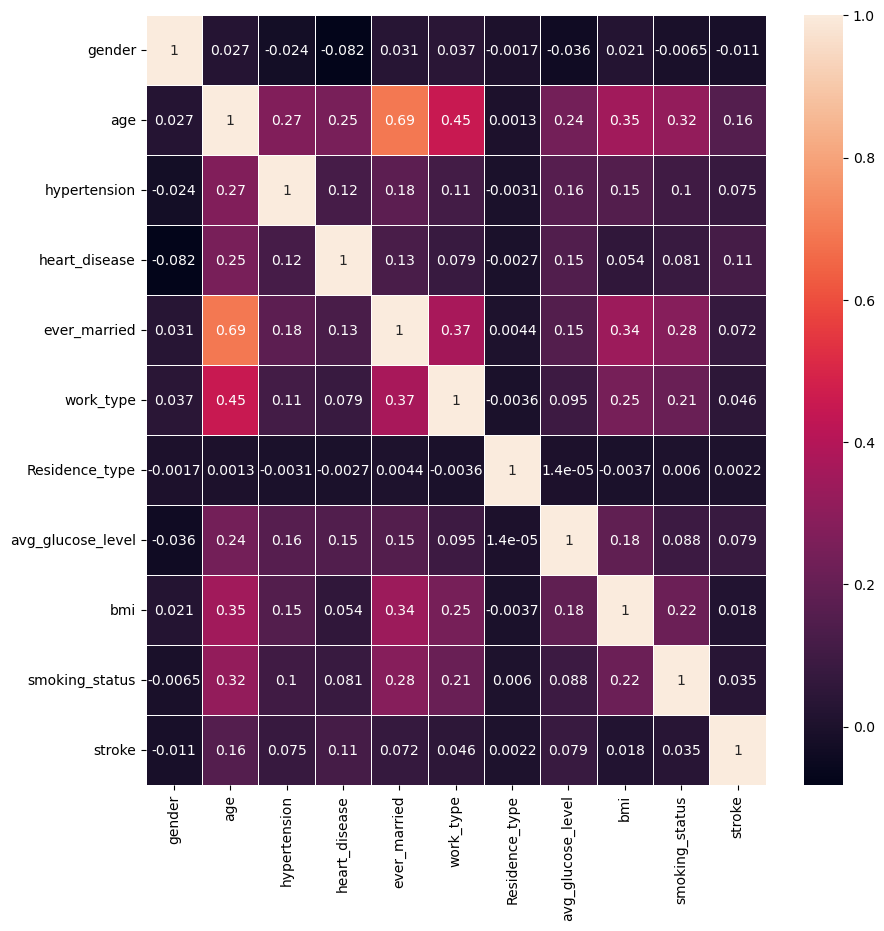

In [33]:
features = ['gender', 'ever_married', 'hypertension', 'heart_disease']

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dft.corr(method='pearson'), annot=True, linewidths=.5, ax=ax)
# sns.heatmap(dft.corr(method='spearman'), annot=True, linewidths=.5, ax=ax)
plt.show()